# Statistika Inferensial

- inference: prediksi
- feature (bahasa machine learning): variabel (bahasa statistika)
- model yg kita cari harus berhubungan dengan data kita seperti apa (mis: teks -> naive bayes, dll)
- backbone machine learning: statistika inferensial

## Distribusi Probabilitas
-> menggambarkan peristiwa dalam hal probabilitas

### Distribusi Seragam (Uniform)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(5,5)})

from IPython.display import Math, Latex
from IPython.display import Image

In [8]:
dadu = np.random.randint(1,7,100000) #bilangan bulat random dari 1-6 sebanyak 1000 kali

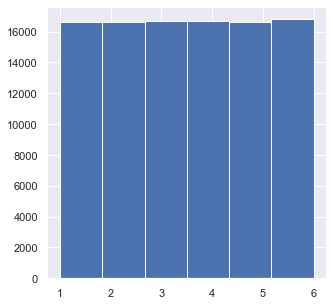

In [10]:
plt.hist(dadu, bins=6)
plt.show()

#bar plot karena datanya diskrit.

- dadu berdistribusi seragam. frekuensi kemunculan masing2 anggota sample.
- statistika frekuentis: percobaan berulang, kejadiannya semakin besar, dapat dilihat kemiripan masing2 nilai frekuensi dari anggota sample -> frekuensinya kurang lebih sama -> artinya berdistribusi seragam.

### Distribusi Normal

penting. sering digunakan karena paling ideal dalam sebuah data. banyak metode ml yang membuat distr normal sebagai patokan.

memiliki kurva seperti lonceng.

butuh 2 variabel:
- rata-rata
- standar deviasi/variansi

In [30]:
# norm buat generate

angka_normal = np.random.normal(0, 1, 10000)

In [31]:
angka_normal.mean()

0.003619543841623334

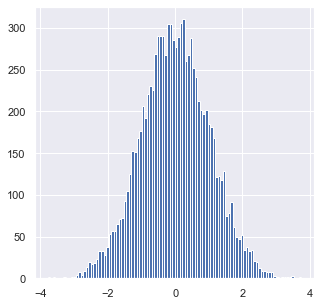

In [32]:
plt.hist(angka_normal, bins=100);

# semakin besar range antara loc (mean) dan scale (sd), semakin landai grafiknya (range x lebih besar)

### Distribusi Gamma

dua parameter yg dibutuhkan. distribusi yang merupakan kepala (ortu) dr dist. lain. mirip dist normal, miring ke kiri. jarang digunakan secara langsung(?) nggak banyak digunakan di real world.

### Distribusi Eksponensial

turunan dari distribusi gamma. kalo naik, naik terus. kalo turun, turun terus. mirip dengan dist. gamma. distribusi ini nggak dipakai secara mentah2.

### Distribusi Poisson

digunakan untuk memprediksi macet/tidak di suatu lokasi. estimasi waktu sampe ke suatu tempat. (google maps). poisson -> diskrit.

In [35]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=100) #mu parameter, bebas nilainya berapa

(array([ 4., 18., 22., 27., 14.,  9.,  3.,  2.,  0.,  1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

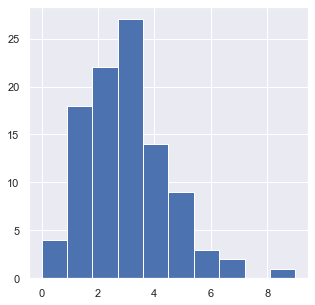

In [36]:
plt.hist(data_poisson, bins=10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribusi Poisson'), Text(0, 0.5, 'Frequency')]

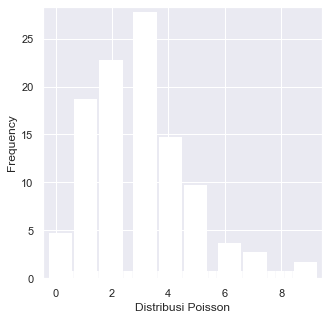

In [37]:
ax = sns.distplot(data_poisson,
                 bins = 30,
                 kde=False,
                 color='skyblue',
                 hist_kws={"linewidth":15, "alpha":1})
ax.set(xlabel="Distribusi Poisson", ylabel='Frequency')
# kde False karena poisson diskrit, kalo data kontinu pake kde.

### Distribusi Binomial

ada 2 kemungkinan aja, sukses/ga, lolos/ga, menang/kalah, dll. hasil tidak harus selalu sama dengan kemungkinan. setiap percobaan tidak bergantung satu sama lain.

parameter:
- n: jumlah total percobaan
- p: probs. keberhasilan pada setiap percobaan

In [38]:
from scipy.stats import binom
data_binom = binom.rvs(n=5, p=0.8, size=10000)

(array([3.000e+00, 0.000e+00, 6.800e+01, 0.000e+00, 5.550e+02, 0.000e+00,
        2.091e+03, 0.000e+00, 3.988e+03, 3.295e+03]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

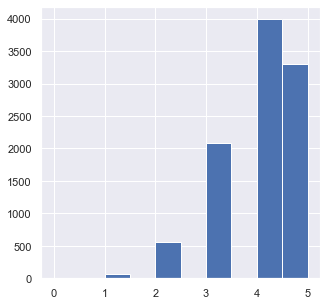

In [42]:
plt.hist(data_binom, bins=10)

### Dist Bernoulli

kaya dist. binom cuman n=1.

--> Distribusi ada banyak: Weibull, Paretto, di atas distribusi2 dasar.

## Interval Kepercayaan

CI kecil, model/data jelek. CI lebar, model/data bagus.

# Simulasi pada Data

In [45]:
data = pd.read_csv(r"C:\Users\Hp\heart.csv")

In [46]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [48]:
data['sex1'] = data.sex.replace({1: "Male", 0: "Female"})

In [49]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


In [50]:
df = data[['sex1', 'target']].dropna()

In [51]:
df.head()

,sex1,target
0,Male,0
1,Male,0
2,Male,0
3,Male,0
4,Female,0


In [52]:
pd.crosstab(df.target, df.sex1)

sex1,Female,Male
target,,
0,86,413
1,226,300


In [54]:
p_fm = 226/(86+226) #proporsi perempuan
p_fm

0.7243589743589743

In [55]:
n_wanita = 86+226
n_wanita

312

In [57]:
se_wanita = np.sqrt(p_fm * (1-p_fm)/n_wanita)
se_wanita

0.02529714756803247

In [64]:
z_score = 1.96
a = p_fm - z_score * se_wanita
b = p_fm + z_score * se_wanita
print("CI:", "(",a,",",b,")")

CI: ( 0.6747765651256307 , 0.773941383592318 )


In [66]:
data.groupby('sex1').agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [67]:
mean_fe = 261.45
sd = 64.46
n =312
z = 1.96

In [68]:
se = sd/np.sqrt(n)
se

3.6493288810480315

In [69]:
c = mean_fe - z * se
d = mean_fe + z * se
print("CI:", "(",c,",",d,")")

CI: ( 254.29731539314585 , 268.60268460685415 )


## Hypothesis Testing

In [70]:
import statsmodels.api as sm

In [71]:
n =1018
pnull = 0.52
phat = 0.56

In [72]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

In [74]:
# hipotesis, h1, bikin ho, ho bisa ditolak, sehingga secara informal bisa nerima h1. (melalui tes)